In [20]:
import pandas as pd
import numpy as np
from datetime import timedelta
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
loan_file_path = '/Users/mengwu/Documents/lending-club-loan-data/loan.csv'
dictionary_file_path = '/Users/mengwu/Documents/lending-club-loan-data/LCDataDictionary.xlsx'
cols = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'issue_d', 'dti', 
        'revol_bal', 'total_pymnt', 'loan_status', 'purpose', 'installment', 'delinq_2yrs',
         'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']
chunk_size = 10 ** 5
chunk = pd.read_csv(loan_file_path, usecols=cols, chunksize=chunk_size, iterator=True, low_memory=False)
df_loan = pd.concat(chunk, ignore_index=True)
df = df_loan.copy(deep=True)

##  Part 1: Data Exploration and Evaluation 

In [21]:
# Data Exploration
df_loan[df_loan['loan_status'] == 'Fully Paid'].tail()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt
2260650,10000,10000,60 months,28.72,315.72,F,48000.0,Oct-2017,Fully Paid,small_business,16.08,0.0,0.0,11.0,0.0,5314,59.0,12.0,13342.702033
2260652,25000,25000,60 months,30.65,818.85,F,54778.0,Oct-2017,Fully Paid,debt_consolidation,12.81,1.0,0.0,14.0,0.0,4521,11.6,27.0,25027.673750
2260656,17950,17950,60 months,30.17,582.62,F,53758.0,Oct-2017,Fully Paid,debt_consolidation,33.24,0.0,1.0,11.0,1.0,5959,35.9,24.0,20803.775467
2260658,15000,15000,60 months,16.02,364.94,C,85000.0,Oct-2017,Fully Paid,debt_consolidation,14.66,0.0,3.0,19.0,0.0,6988,24.8,87.0,16112.317714
2260664,12000,12000,60 months,25.82,358.01,E,30000.0,Oct-2017,Fully Paid,debt_consolidation,19.28,3.0,1.0,10.0,0.0,3497,20.2,26.0,14499.802172


In [18]:
df_loan['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [3]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,purpose,dti,revol_bal,total_pymnt
0,2500,2500,36 months,13.56,84.92,C,55000.0,Dec-2018,Current,debt_consolidation,18.24,4341,167.02
1,30000,30000,60 months,18.94,777.23,D,90000.0,Dec-2018,Current,debt_consolidation,26.52,12315,1507.11
2,5000,5000,36 months,17.97,180.69,D,59280.0,Dec-2018,Current,debt_consolidation,10.51,4599,353.89
3,4000,4000,36 months,18.94,146.51,D,92000.0,Dec-2018,Current,debt_consolidation,16.74,5468,286.71
4,30000,30000,60 months,16.14,731.78,C,57250.0,Dec-2018,Current,debt_consolidation,26.35,829,1423.21


In [56]:
# Feature Transformation
df['term'] = df['term'].apply(lambda x: int(x.split()[0])) # convert term to numerical
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [57]:
# Data Size
df.shape

(2260668, 13)

In [58]:
df.dtypes

loan_amnt               int64
funded_amnt             int64
term                    int64
int_rate              float64
installment           float64
grade                  object
annual_inc            float64
issue_d        datetime64[ns]
loan_status            object
purpose                object
dti                   float64
revol_bal               int64
total_pymnt           float64
dtype: object

In [59]:
# Check data for potential outliers
df.describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,dti,revol_bal,total_pymnt
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260668e+06,2.260668e+06
mean,1.504693e+04,1.504166e+04,4.291032e+01,1.309291e+01,4.458076e+02,7.799243e+04,1.882420e+01,1.665846e+04,1.182403e+04
std,9.190245e+03,9.188413e+03,1.086716e+01,4.832114e+00,2.671737e+02,1.126962e+05,1.418333e+01,2.294831e+04,9.889599e+03
min,5.000000e+02,5.000000e+02,3.600000e+01,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
1%,1.525000e+03,1.516750e+03,3.600000e+01,5.320000e+00,5.346000e+01,1.680000e+04,1.720000e+00,1.260000e+02,4.645067e+02
10%,5.000000e+03,5.000000e+03,3.600000e+01,7.260000e+00,1.594000e+02,3.400000e+04,7.280000e+00,2.934000e+03,1.899934e+03
25%,8.000000e+03,8.000000e+03,3.600000e+01,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,5.950000e+03,4.272580e+03
50%,1.290000e+04,1.287500e+04,3.600000e+01,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,1.132400e+04,9.060870e+03
75%,2.000000e+04,2.000000e+04,6.000000e+01,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,2.024600e+04,1.670797e+04
90%,3.000000e+04,3.000000e+04,6.000000e+01,1.942000e+01,8.264300e+02,1.300000e+05,3.050000e+01,3.352700e+04,2.614049e+04


#### Observations so far: Some extreme values do not make much logical sense and need a closer look
 * 1. notice annual_inc min = 0 and max = 110,000,000 
 * 2. dti min value = -1 and max = 999
 * 3. revol_bal max value = 2.9 mln

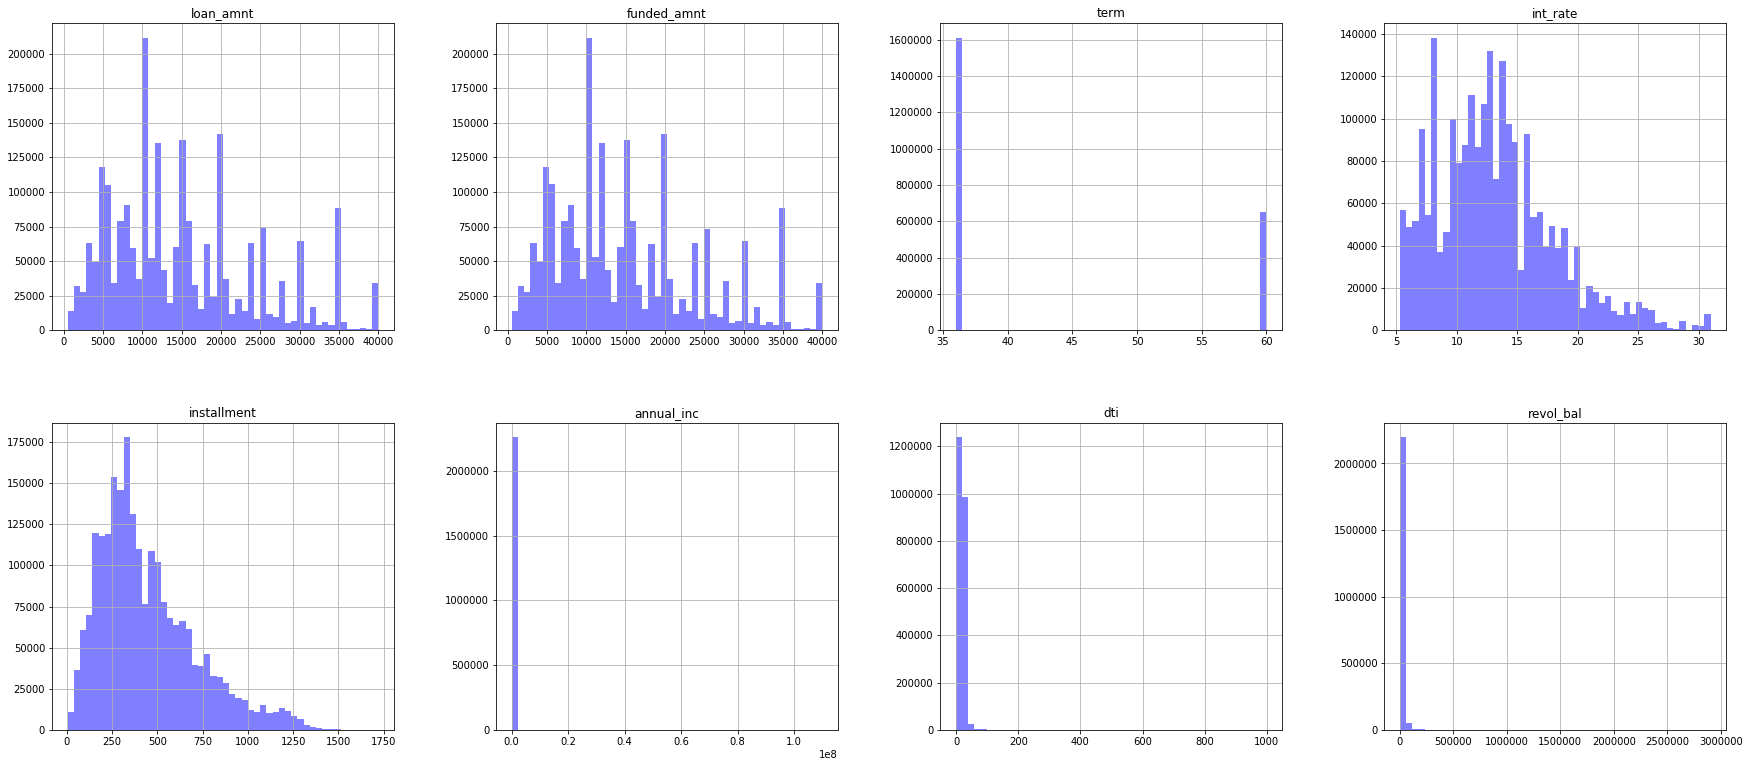

In [61]:
# Features value distribution plots
df_num = df.select_dtypes(include=['float64', 'int64'])
fig, ax = plt.subplots(len(df_num.columns)//4, 4, figsize=(30, 13))
axes = ax.flatten()
for col, axis in zip(df_num.columns, axes):
    df_num.hist(column = col, color='b', alpha=0.5, bins=50, ax=axis)

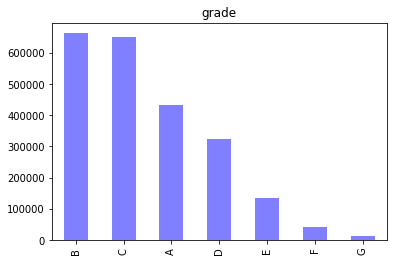

In [62]:
# Plot grade, issue date and loan status distribution
df['grade'].value_counts().plot(kind='bar', color='b', alpha=0.5, title='grade')

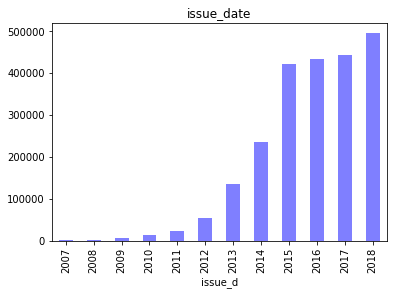

In [63]:
df.groupby(df['issue_d'].dt.year)['issue_d'].count().plot(kind='bar', color='b', alpha=0.5, title='issue_date')

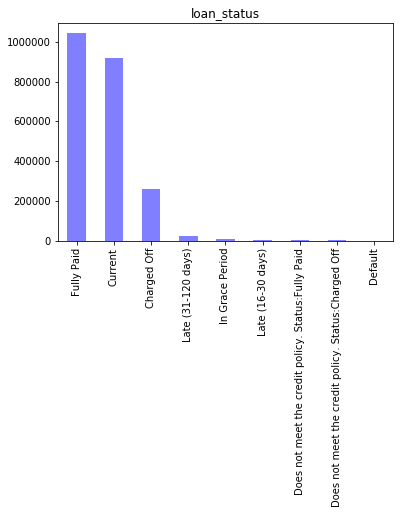

In [64]:
df['loan_status'].value_counts().plot(kind='bar', color='b', alpha=0.5, title='loan_status')

In [65]:
# Check for any missing value in each column
df.isnull().sum()

loan_amnt         0
funded_amnt       0
term              0
int_rate          0
installment       0
grade             0
annual_inc        4
issue_d           0
loan_status       0
purpose           0
dti            1711
revol_bal         0
total_pymnt       0
dtype: int64

#### Handle Outliers
* Since the null values are very small percentage of the data (<0.001%) and it is hard to impute these data. For simplicity i will drop those rows with missing values.
* annual_inc: 99th percentile self report annual income is 270,000 and annual income is self reported so there might be human input error as well. Thus in this analysis I capped the annual income at 270,000.
* dti: 99th percentile dti in this data set is ~ 40%. A high debt-to-income ratio (anything above 40%, usually) indicates the borrower may already have or are about to take on more debt than he/she can reasonably handle given current income.  I chose to cap the dti = 100 to get a better distribution look.
* revol_bal: based on the distribution plot the max value 2.9 mln which is way higer than 99th percentile value ~98000. Thus in this analysis I set the cap value for revolving balance at 100000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d8fffa0>]],
      dtype=object)

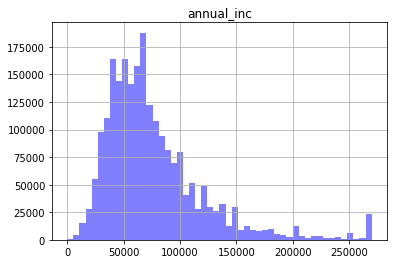

In [67]:
# Handle Outliers
df.isnull().sum()/df.shape[0] # as % of data size
df.dropna(how='any', inplace=True)
annual_inc_cap = 270000
df.loc[df['annual_inc'] >= annual_inc_cap, 'annual_inc'] = annual_inc_cap
df.hist(column = 'annual_inc', color='b', alpha=0.5, bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ce72040>]],
      dtype=object)

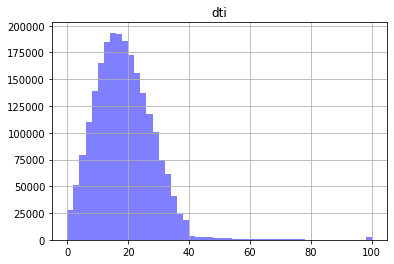

In [68]:
df.loc[df['dti'] > 100, 'dti'] = 100
df.loc[df['dti'] < 0, 'dti'] = 0 # debt-to-income shouldnt be negative
df.hist(column='dti', color='b', alpha=0.5, bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fb01e80>]],
      dtype=object)

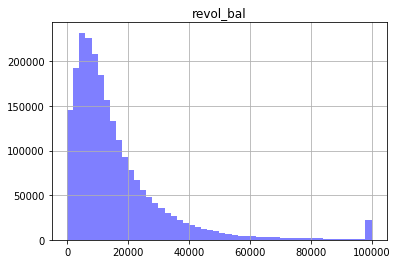

In [69]:
revol_bal_cap = 100000
df.loc[df['revol_bal'] > revol_bal_cap, 'revol_bal'] = revol_bal_cap
df.hist(column='revol_bal', color='b', alpha=0.5, bins=50)

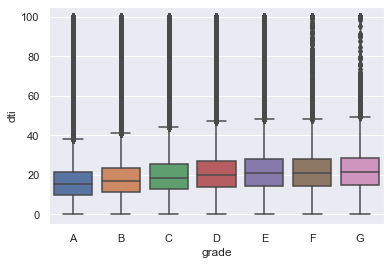

In [206]:
ax = sns.boxplot(x="grade", y="dti", data=df.sort_values(by='grade'))

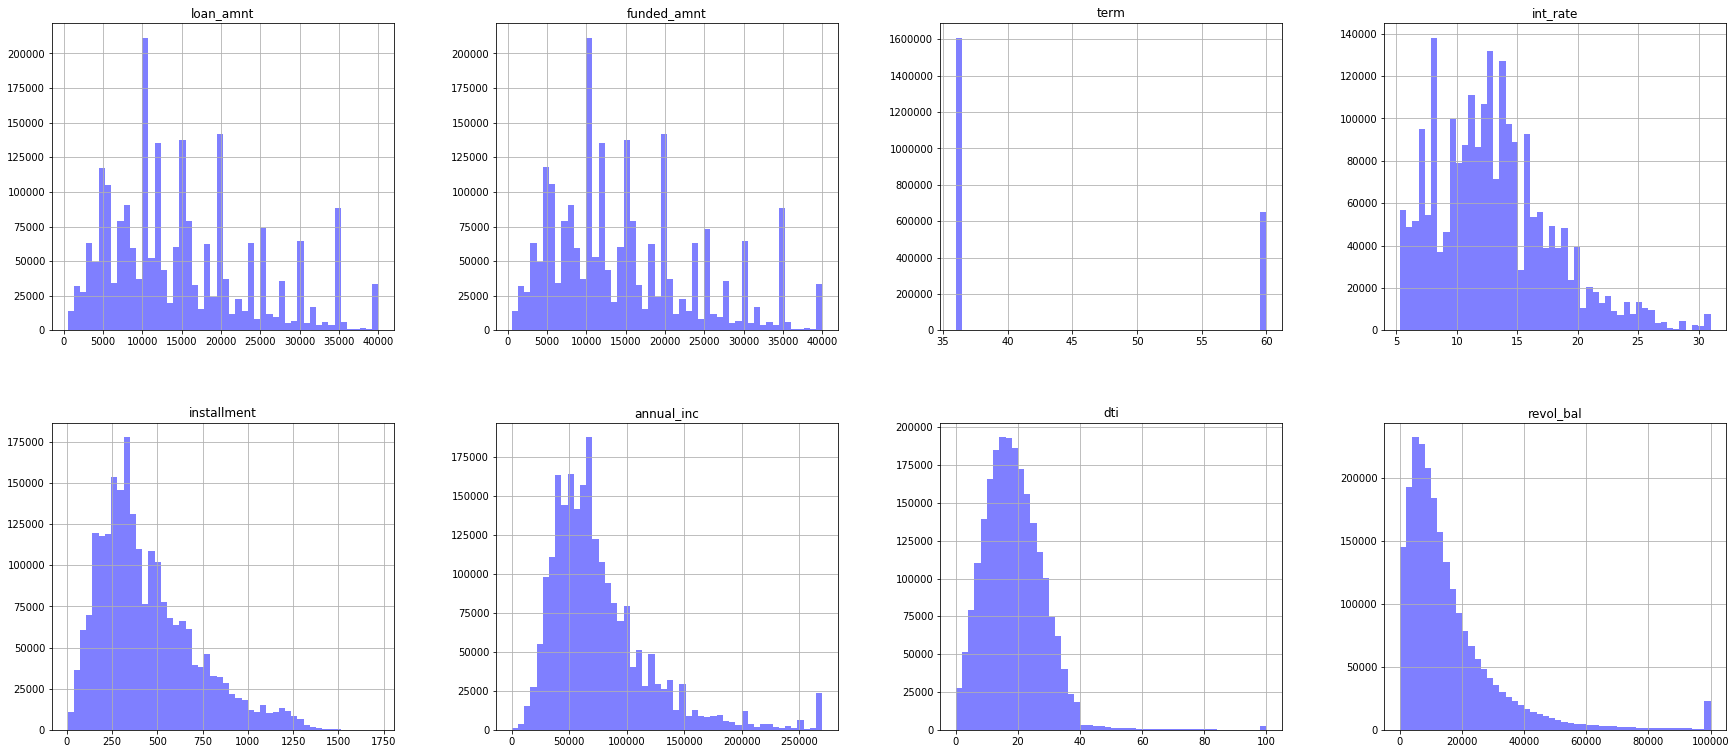

In [71]:
# Summary of distribution of the features
df_num = df.select_dtypes(include=['float64', 'int64'])
fig, ax = plt.subplots(len(df_num.columns)//4, 4, figsize=(30, 13))
axes = ax.flatten()
for col, axis in zip(df_num.columns, axes):
    df_num.hist(column = col, color='b', alpha=0.5, bins=50, ax=axis)

## Part 2: Business Analysis
* What percentage of loans have been fully paid? 

In [72]:
df_36 = df[(df['term'] == 36) & (df['issue_d'] <= '12/1/2015') & (df['loan_status'] != 'Current')] 
fully_paid = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
percent_fully_paid = df_36[df_36['loan_status'].isin(fully_paid)].shape[0]/df_36.shape[0]
print('{:.2%} of loans have been fully paid.'.format(percent_fully_paid))

86.04% of loans have been fully paid.


* When bucketed by year of origination and grade, which cohort has the highest rate of defaults? Here I assume that any loan which was not fully paid had defaulted.

In [74]:
cohort_count = df_36.groupby([df['issue_d'].dt.year, 'grade'])['loan_status'].count()

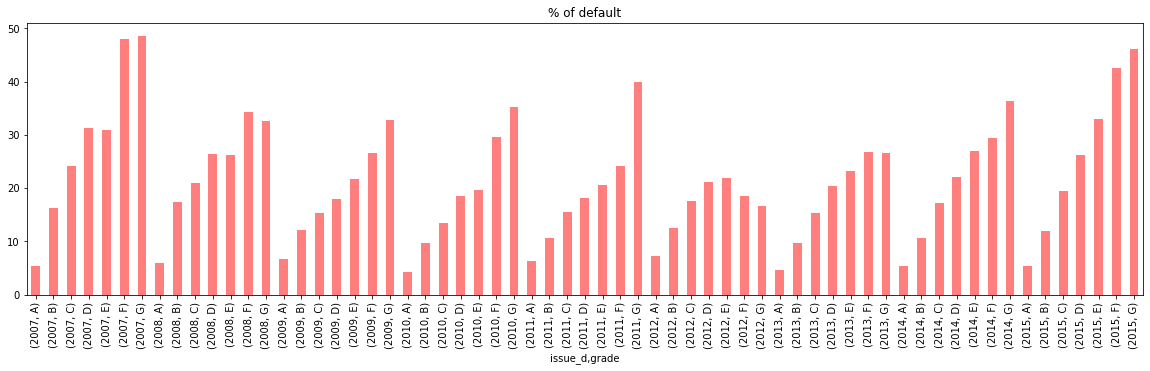

In [75]:
cohort_fully_paid = df_36[df_36['loan_status'].isin(fully_paid)].groupby([df['issue_d'].dt.year, 'grade'])['loan_status'].count()
cohort_default_rate = (1 - cohort_fully_paid/cohort_count)*100
f, ax = plt.subplots(1, 1, figsize = (20, 5))
cohort_default_rate.plot(kind='bar', ax=ax, title='% of default', color='r', alpha=0.5)

In [76]:
cohort_default_rate.idxmax()

(2007, 'G')

As we can see from the plot above, the cohort with the highest rate of defaults is origination year of 2007 and grade G.

* When bucketed by year of origination and grade, what annualized rate of return have these loans generated on average? 

In [149]:
cohort_pymt = df_36.groupby([df['issue_d'].dt.year, 'grade'])['total_pymnt'].sum()
cohort_funded = df_36.groupby([df['issue_d'].dt.year, 'grade'])['funded_amnt'].sum()
cohort_aror = (cohort_pymt / cohort_funded)**(1/3) - 1

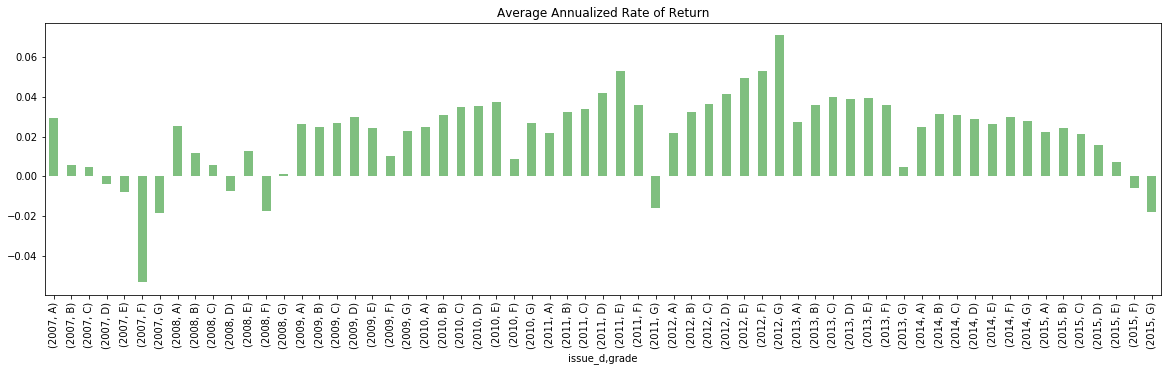

In [123]:
f, ax = plt.subplots(1, 1, figsize = (20, 5))
cohort_aror.plot(kind='bar', ax=ax, title='Average Annualized Rate of Return', color='g', alpha=0.5)

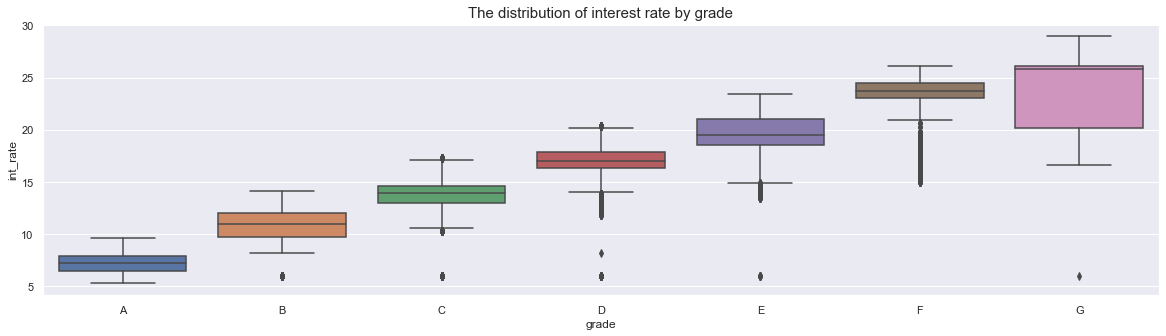

In [205]:
# Business Strategy
plt.subplots(figsize=(20,5))
plt.title("The distribution of interest rate by grade").set_size(15)
sns.boxplot(x="grade", y="int_rate", data=df_36.sort_values(by='grade'))

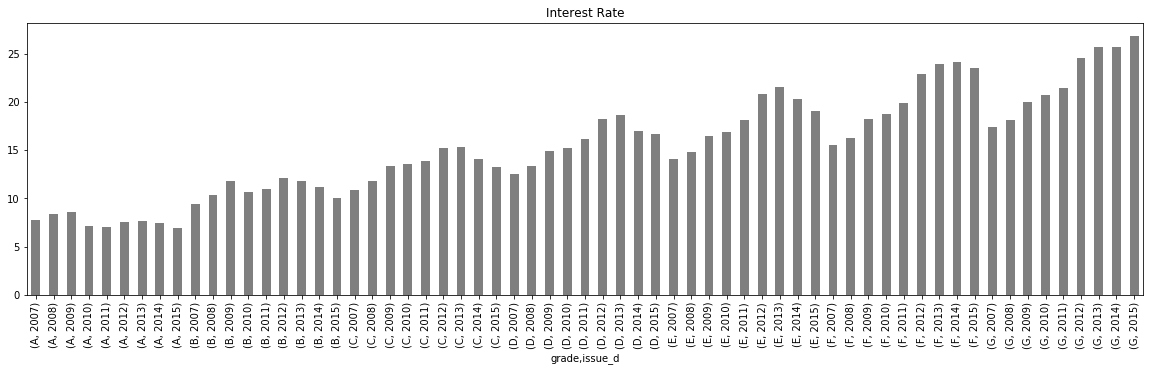

In [81]:
cohort_int_rate = df_36.groupby(['grade', df['issue_d'].dt.year])['int_rate'].mean()
f, ax = plt.subplots(1, 1, figsize = (20, 5))
cohort_int_rate.plot(kind='bar', ax=ax, title='Interest Rate', color='k', alpha=0.5)

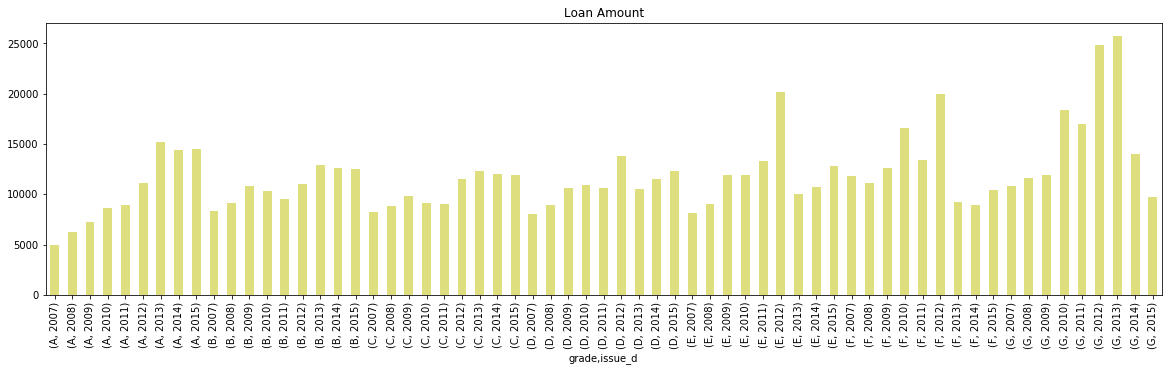

In [82]:
cohort_loan_amount = df_36.groupby(['grade', df['issue_d'].dt.year])['loan_amnt'].mean()
f, ax = plt.subplots(1, 1, figsize = (20, 5))
cohort_loan_amount.plot(kind='bar', ax=ax, title='Loan Amount', color='y', alpha=0.5)

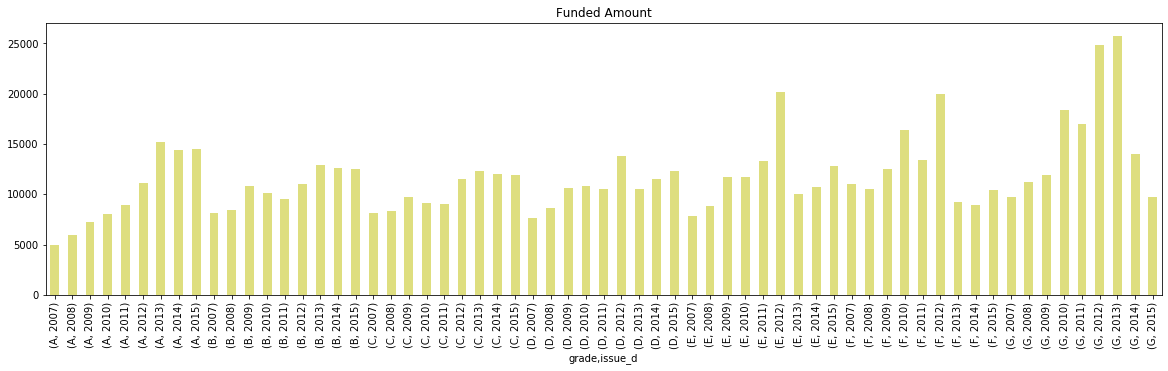

In [83]:
cohort_funded_amount = df_36.groupby(['grade', df['issue_d'].dt.year])['funded_amnt'].mean()
f, ax = plt.subplots(1, 1, figsize = (20, 5))
cohort_funded_amount.plot(kind='bar', ax=ax, title='Funded Amount', color='y', alpha=0.5)

Text(0.5, 0.98, 'Loan Average Life by Year of Origination and Grade')

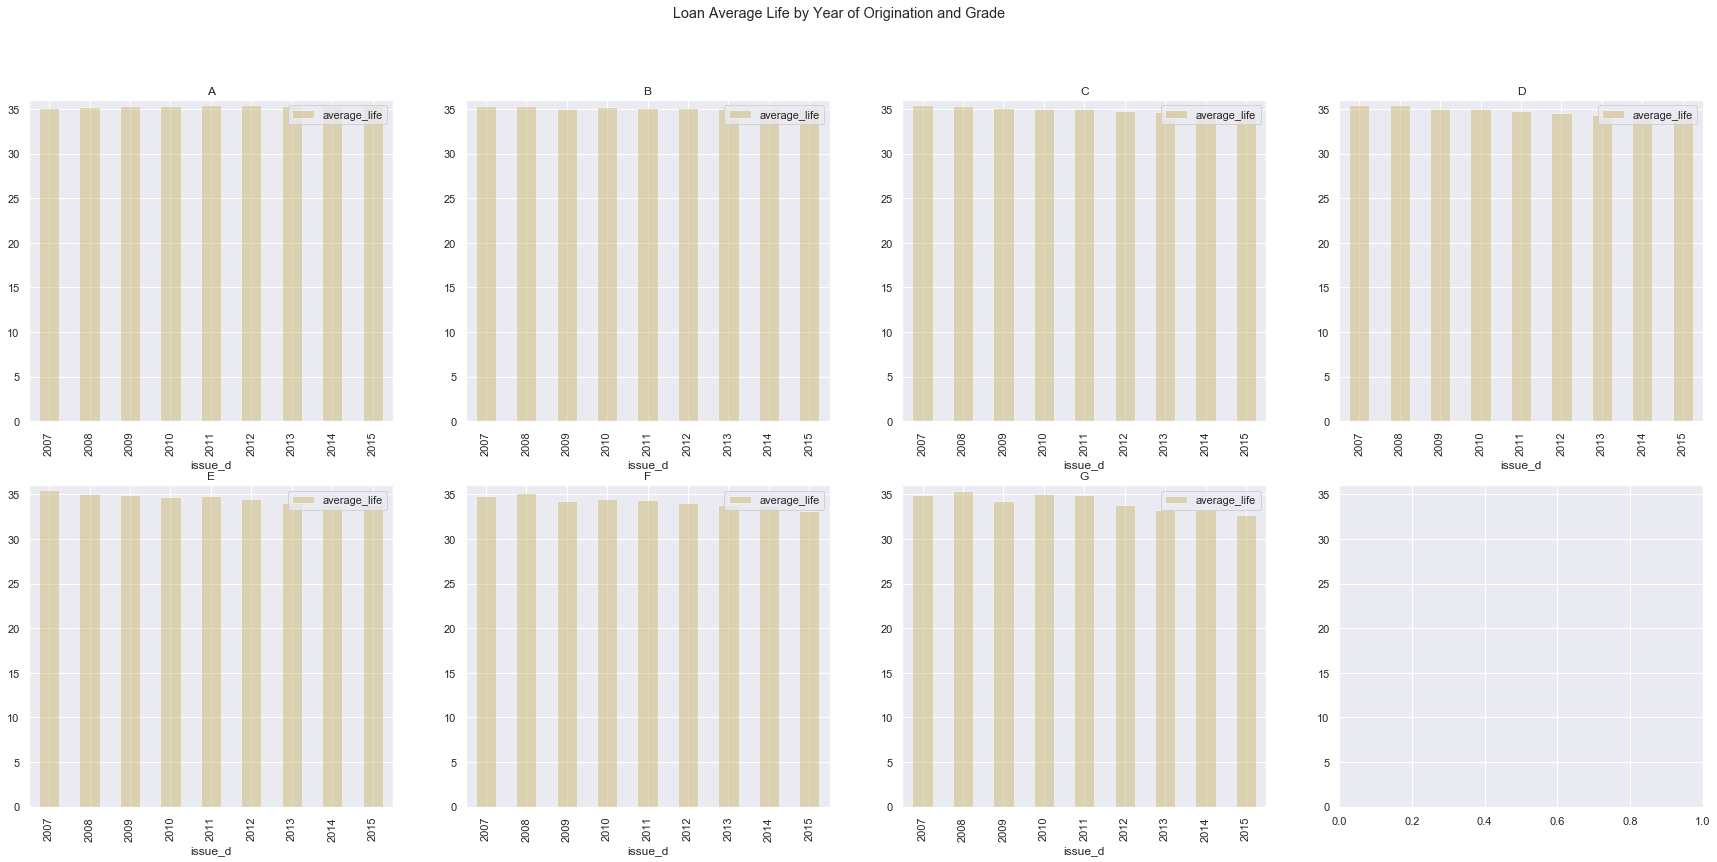

In [210]:
# Loan Average Life by Year of Origination and Grade
df_36.loc[:, 'average_life'] = df_36['total_pymnt'] / df_36['installment']
df_36_fully_paid = df_36[df_36['loan_status'].isin(fully_paid)]
cohort_avg_life = df_36_fully_paid.groupby(['grade', df['issue_d'].dt.year])['average_life'].mean()
cohort_avg_life = cohort_avg_life.to_frame().reset_index().set_index('issue_d')
grades = sorted(list(df_36['grade'].unique()))
fig, ax = plt.subplots(len(grades)//4+1, 4, figsize=(30, 13), subplot_kw={'ylim': (0,36)})
axes = ax.flatten()
for val, axis in zip(grades, axes):
    temp = cohort_avg_life[cohort_avg_life['grade'] == val]
    temp.plot(kind='bar', title=val, color='y', alpha=0.5, ax=axis)
fig.suptitle('Loan Average Life by Year of Origination and Grade') 

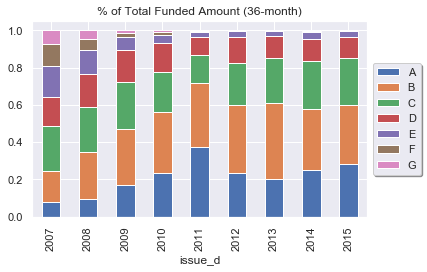

In [190]:
# Total Loan Originations Decomposition by Grade
cohort_funded = df_36.groupby([df['issue_d'].dt.year, 'grade'])['funded_amnt'].sum().reset_index()
total_funded = df_36.groupby([df['issue_d'].dt.year])['funded_amnt'].sum().to_frame('total_funded')
for grade in list(cohort_funded['grade'].unique()):
    total_funded[grade] = cohort_funded.loc[cohort_funded['grade'] == grade, 'funded_amnt'].values
total_funded_pct = total_funded.iloc[:, 1:].div(total_funded.total_funded, axis=0)

fig = plt.figure()
ax = plt.subplot(111)

total_funded_pct.plot(kind='bar', stacked=True, ax=ax, title='% of Total Funded Amount (36-month)')

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True, ncol=1)

plt.show()

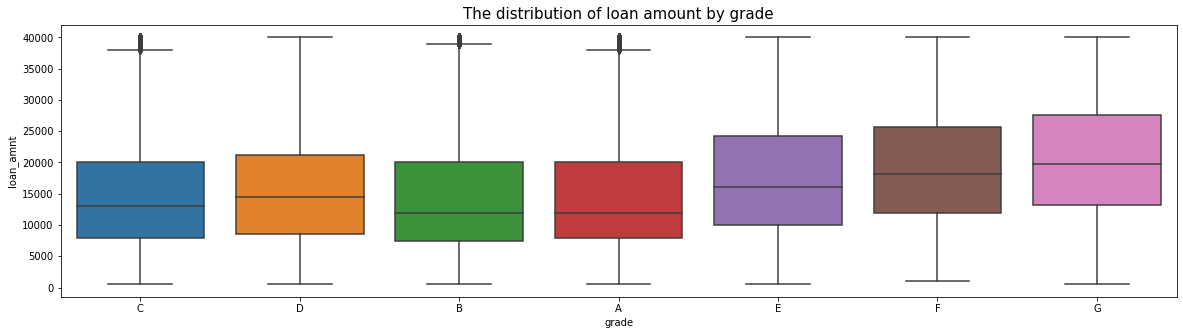

In [30]:
plt.subplots(figsize=(20,5))
plt.title("The distribution of loan amount by grade").set_size(15)
sns.boxplot(x="grade", y="loan_amnt", data=df)